Вы работаете в компании, занимающейся продажей автомобилей, и ваша задача - провести анализ данных о продажах за последний год. Вам предоставлена таблица (cars93.csv) с данными о продажах, включающая следующую информацию: марка автомобиля, модель, цена и количество проданных единиц.

Вам необходимо выполнить следующие задачи с использованием библиотеки numpy:

1. Загрузка данных: Загрузите данные из файла CSV в numpy массив. Убедитесь, что данные корректно загружены и сохранены в нужном формате.

2. Обработка данных: Проведите необходимую обработку данных, чтобы убрать некорректные значения или пропуски. Например, удалите строки с отрицательными значениями цены продажи или нулевым количеством проданных единиц.

3. Статистический анализ: Вычислите основные статистические показатели для каждого столбца данных. Например, вычислите среднюю цену продажи, максимальное количество проданных единиц и т.д.

4. Визуализация данных: Постройте графики, чтобы визуализировать полученные результаты. Например, постройте график зависимости цены продажи от года выпуска автомобиля.

5. Группировка данных: Сгруппируйте данные по марке автомобиля и вычислите суммарную стоимость продаж и количество проданных единиц для каждой марки.

6. Рекомендации: Основываясь на полученных результатах, сделайте рекомендации по улучшению бизнес-процессов компании. Например, предложите сконцентрироваться на продаже автомобилей определенной марки или модели, которые пользуются большим спросом.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# для наглядности таблицы откроем ей с помощью библиотеки pandas
data = pd.read_csv('/content/Car_sales.csv')
print(data.shape)
data.head()

(157, 16)


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


    Свойства сущности:
    Manufacturer (Производитель)
    Model	(Модель)
    Sales in thousands (Продажи в тысячах, шт)
    year resale value	(Стоимость перепродажи в год)
    Vehicle type (Тип машины)
    Price in thousands (цена в тысячах, $)
    Engine size	Horsepower (объем двигателя)
    Wheelbase	(тип колёс)
    Width	(ширина)
    Length	(длина)
    Curb weight	(масса)
    Fuel capacity	(объем топливного бака)
    Fuel_efficiency	(на сколько хватает топлива)
    Latest (запуск)
    Launch	(коэффициент)
    Power perf factor (мощность и производительность)

Теперь обработайте каждый числовой столбец по отдельности. Удалите строки с отрицательными, пропущенными и nan значениями.

In [ ]:
# Подгрузите данные таблицы
data_2 = np.genfromtxt('/content/Car_sales.csv', delimiter=',', usecols=(2))
data_3 = np.genfromtxt('/content/Car_sales.csv', delimiter=',', usecols=(3))
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
# Обработайте данные: уберите все пустые строки, удалите отрицательные значения только в том случае, если область допустимых значений свойства их не подрузамевает.
data_2 = data_2[~np.isnan(data_2)]  # Удаление строк с пропущенными значениями
data_3 = data_3[~np.isnan(data_3)]  # Удаление строк с пропущенными значениями
data_2 = data_2[np.where(data_2 >= 0)] # Удаление строк с отрицательными значениями
data_3 = data_3[np.where(data_3 >= 0)] # Удаление строк с отрицательными значениями
data_2, data_3

(array([1.69190e+01, 3.93840e+01, 1.41140e+01, 8.58800e+00, 2.03970e+01,
        1.87800e+01, 1.38000e+00, 1.97470e+01, 9.23100e+00, 1.75270e+01,
        9.15610e+01, 3.93500e+01, 2.78510e+01, 8.32570e+01, 6.37290e+01,
        1.59430e+01, 6.53600e+00, 1.11850e+01, 1.47850e+01, 1.45519e+02,
        1.35126e+02, 2.46290e+01, 4.25930e+01, 2.64020e+01, 1.79470e+01,
        3.22990e+01, 2.18550e+01, 1.07995e+02, 7.85400e+00, 3.27750e+01,
        3.11480e+01, 3.23060e+01, 1.34620e+01, 5.34800e+01, 3.06960e+01,
        7.60340e+01, 4.73400e+00, 7.11860e+01, 8.80280e+01, 9.16000e-01,
        2.27061e+02, 1.67670e+01, 3.10380e+01, 1.11313e+02, 1.01323e+02,
        1.81749e+02, 7.02270e+01, 1.13369e+02, 3.50680e+01, 2.45815e+02,
        1.75670e+02, 6.34030e+01, 2.76747e+02, 1.55787e+02, 1.25338e+02,
        2.20650e+02, 5.40561e+02, 1.99685e+02, 2.30902e+02, 7.32030e+01,
        1.28550e+01, 7.60290e+01, 4.11840e+01, 6.66920e+01, 2.94500e+01,
        2.37130e+01, 1.54670e+01, 5.55570e+01, 8.05

Теперь давайте сравним каждый численный показатель и найдём ту зависимость, имеющую наибольший коэффициент корреляции.

In [ ]:
# Извлечение столбцов 2 и 3

min_length = min(len(data_2), len(data_3))  # Находим минимальную длину из двух массивов (чтобы количество данных совпадало)

data_2 = np.resize(data_2, min_length)  # Изменяем размер data_2 до минимальной длины
data_3 = np.resize(data_3, min_length)  # Изменяем размер data_3 до минимальной длины

# Нахождение коэффициента корреляции
correlation_coefficient = np.corrcoef(data_2, data_3)[0, 1]
correlation_coefficient

-0.17965267725992295

Что означает получившееся значение коэффициента корреляции? Сделайте вывод.

Мы хотим проанализировать наши данные.
Для этого найдём для двух свойств с самой большой зависимостью:

    1) Среднее значение (то значение, которое "обычно" для выборки).
    2) Минимальное и максимальное значение, чтобы численно увидеть разброс выборки.
    3) Математическое ожидание (оно покажет нам средне ожидаемую величину)
    4) Медиану (это центральное значение в выборке, все остальные либо меньше его, либо больше)
    5) Средне квадратичное отклонение (оно покажет нам среднее расстояние между значениями в выборке и их средним значением)

In [ ]:
# Статистический анализ, проводится для каждой сущности свой
mean_value = np.mean(data_2)
min_value = np.min(data_2)
max_value = np.max(data_2)
expectation = np.average(data_2)
median = np.median(data_2)
std_deviation = np.std(data_2)

print("Среднее значение:", mean_value)
print("Минимальное значение:", min_value)
print("Максимальное значение:", max_value)
print("Математическое ожидание:", expectation)
print("Медиана:", median)
print("Среднеквадратичное отклонение:", std_deviation)

Среднее значение: 56.572239669421485
Минимальное значение: 0.11
Максимальное значение: 540.561
Математическое ожидание: 56.572239669421485
Медиана: 30.696
Среднеквадратичное отклонение: 72.37222411833922


Теперь построим график зависимости выбранных Вами величин.

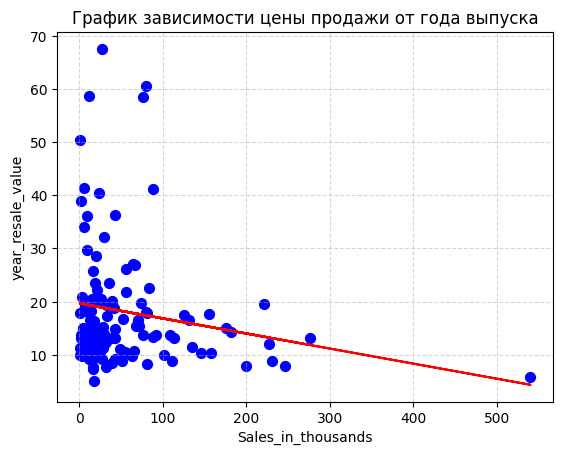

In [ ]:
plt.scatter(data_2, data_3, color='blue', marker='o', s=50)  # График точек
plt.xlabel('Sales_in_thousands')
plt.ylabel('year_resale_value')
plt.title('График зависимости цены продажи от года выпуска')

# Добавление сетки на график
plt.grid(True, linestyle='--', alpha=0.5)

# Добавление линейной регрессии
fit = np.polyfit(data_2, data_3, deg=1) #Найдём коэффициент наклона прямой
plt.plot(data_2, fit[0] * np.array(data_2) + fit[1], color='red')

plt.show()

Проанализируйте график. Что вы видете? Какую оценку можете ему дать?

Теперь попробуем сгруппировать данные. Выделите все марки машин и посчитайте для них суммарное количество проданных единиц и прибыль.

In [ ]:
# Загрузка данных из файла
data = pd.read_csv('Car_sales.csv')

# Группировка данных по столбцу и вычисление суммарной стоимости продаж и количества проданных единиц
grouped_data = data.groupby('Manufacturer').agg({'Price_in_thousands': 'sum', 'Sales_in_thousands': 'sum'})

# Создание массива из последних двух столбцов
last_two_columns = grouped_data.iloc[:, -2:].values
# Расчет суммы в каждой строке
sum_per_row = np.sum(last_two_columns, axis=1)

# Добавление столбца суммы в таблицу grouped_data
grouped_data = grouped_data.assign(Sum_per_row=sum_per_row)

# Вывод результатов
print(grouped_data)

              Price_in_thousands  Sales_in_thousands  Sum_per_row
Manufacturer                                                     
Acura                     91.900              79.005      170.905
Audi                     119.940              40.557      160.497
BMW                       99.290              46.505      145.795
Buick                    107.125             242.019      349.144
Cadillac                 201.270             112.178      313.448
Chevrolet                180.205             554.365      734.570
Chrysler                 140.585             201.721      342.306
Dodge                    266.350             910.149     1176.499
Ford                     231.520            2022.635     2254.155
Honda                    101.385             592.674      694.059
Hyundai                   36.497             137.326      173.823
Infiniti                  29.465              23.713       53.178
Jaguar                    42.800              15.467       58.267
Jeep      

Ваши рекомендации: